In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Dynamical Systems Concepts for Theoretical Neuroscience

<br/>

Theoretical neuroscience studies neural networks at various spatial and temporal scales. Key questions are how the properties of neurons and networks translate to the observable network dynamics, and how the network dynamics translate to brain functions.
In order to study these questions, a few key methodological ingredients are required:

- a mathematical model that describes a unit of the brain that you are interested in. For example, a single neuron model (*previous lecture, today's lecture*).

- Methods to analyze the dynamics of the mathematical model and how they depend on the model parameters, i.e. the model structure (*previous lecture, today's lecture*).

- Methods to study dynamics in networks and connect the network dynamics to function (*next two lextures*).

The development and study of mathematical models for neuroscience heavily relies on concepts from [dynamical systems theory](https://en.wikipedia.org/wiki/Dynamical_systems_theory), an area of mathematics that is concerned with the behavior of time-evolving systems. 
This lecture will introduce the application of dynamical systems theory to neuroscience questions and covers the following content:

1. Basic concepts from dynamical systems theory
2. The quadratic integrate-and-fire neuron model
3. Equilibria of dynamical systems and where to find them
4. Stability and bifurcations of equilibria 

## Basic concepts from dynamical systems

We consider time-evolving systems of the form

$$\frac{d \mathbf{y}}{dt} = \mathbf{f}(\mathbf{y},t),$$

where $\mathbf{y} \in \mathbb{R}^N$ is an $N$-dimensional state vector and $\mathbf{f}(\mathbf{y},t) \in \mathbb{R}^N$ is a [vector field](https://en.wikipedia.org/wiki/Vector_field) that associates an $N$-dimensional vector to each point of the $N$-dimensional [state space](http://www.scholarpedia.org/article/Phase_space) of the system. The vector field is also known as [flow](https://en.wikipedia.org/wiki/Flow_(mathematics)) of the system, since it contains the rules according to which the system evolves (or flows) in time. As any vector, it has a direction and a magnitude and can be understood as the force on the system as the system passes through the point $\mathbf{y}$ in state space at time point $t$. 

<br/>

Let's consider a simple system of two coupled ordinary linear differential equations of the form

$$\frac{d y_1}{dt} = -y_1 + a y_2,$$
$$\frac{d y_2}{dt} = -y_2 + b y_1,$$

where $a$ and $b$ are scalars that control the coupling strength between $y_1$ and $y_2$.
Then, we can depict the vector-field of this system in the 2-dimensional state space spanned by $y_1$ and $y_2$.

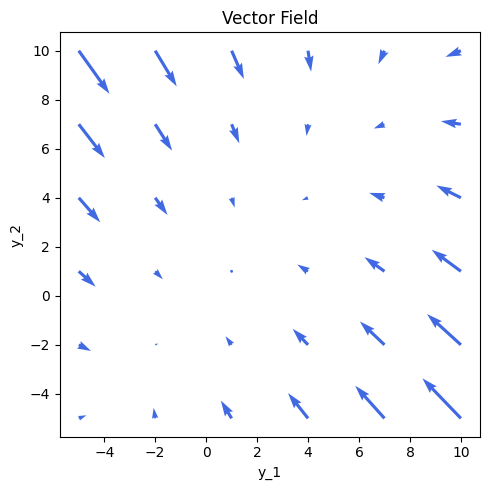

In [2]:
def vector_field(y_1, y_2, a, b):
    dy_1 = -y_1 + a*y_2
    dy_2 = -y_2 + b*y_1
    return dy_1, dy_2

# model parameters
a = 0.5
b = 0.8

# define range of y's to evaluate the vector field at
y_range = np.linspace(-5.0, 10.0, num=6)

# get vector field value
y_1s, y_2s, dy_1s, dy_2s = [], [], [], []
for y_1 in y_range:
    for y_2 in y_range:
        dy_1, dy_2 = vector_field(y_1, y_2, a, b)
        y_1s.append(y_1), y_2s.append(y_2)
        dy_1s.append(dy_1), dy_2s.append(dy_2)

# plot vector field
fig, ax = plt.subplots(figsize=(5, 5))
ax.quiver(y_1s, y_2s, dy_1s, dy_2s, color='royalblue') 
ax.set_xlabel("y_1")
ax.set_ylabel("y_2")
plt.title('Vector Field') 
plt.tight_layout()

Such a depiction is called a phase portrait, because it portraits the vector field in the phase space (another word for *state space*) of the system.
A dynamical system that evolves over time can be visualized either as a time series, i.e. the values of the state variables as a function of time, or as trajectories on the phase portrait (also called *orbits*).

<br/>

We will demonstrate this below by solving the [initial value problem](http://www.scholarpedia.org/article/Initial_value_problems) for $y_1$ and $y_2$ and plotting the resulting dynamics as timeseries and as flow. The initial value problem is the mathematical term for finding $\mathbf{y}(t)$, given an initial condition $\mathbf{y}(t_0)$, where $t_0$ is our starting time, and a vector field $\mathbf{f}$. It amounts to solving the integral

$$ \mathbf{y}(t) = \int_{t'=t_0}^{t'=t} \mathbf{f}(\mathbf{y}, t') dt',$$

which you can do numerically via the forward [Euler method](https://en.wikipedia.org/wiki/Euler_method), i.e. by iteratively applying the rule

$$y(t+\Delta) = y(t) + \Delta \mathbf{f}(\mathbf{y}, t).$$

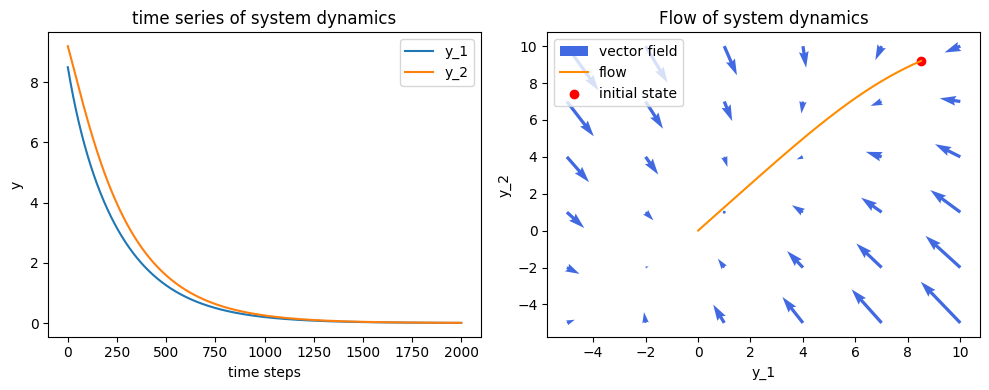

In [3]:
# choose initial condition
y_1, y_2 = 8.5, 9.2

# choose integration step-size and number of steps
delta = 0.01
n_steps = 2000

# perform Euler-based integration
y_1_vals, y_2_vals = [], []
for step in range(n_steps):
    y_1_vals.append(y_1), y_2_vals.append(y_2)
    dy_1, dy_2 = vector_field(y_1, y_2, a, b)
    y_1 += delta*dy_1
    y_2 += delta*dy_2

# plot time series and flow
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))
ax = axes[0]
ax.plot(y_1_vals, label="y_1")
ax.plot(y_2_vals, label="y_2")
ax.set_xlabel("time steps")
ax.set_ylabel("y")
ax.set_title("time series of system dynamics")
ax.legend()
ax = axes[1]
ax.quiver(y_1s, y_2s, dy_1s, dy_2s, color='royalblue', label="vector field")
ax.plot(y_1_vals, y_2_vals, color="darkorange", label="flow")
ax.scatter(y_1_vals[0], y_2_vals[0], color="red", label="initial state")
ax.set_xlabel("y_1")
ax.set_ylabel("y_2")
ax.set_title('Flow of system dynamics')
ax.legend()
plt.tight_layout()

## Equilibria

<br/>

As you can observe in both visualizations of the system dynamics, the system shows some kind of convergence behavior, i.e. it seems to approach a particular point in phase space - the origin. 

<br/>

A major aspect of dynamical systems theory is to describe the [asymptotic](https://en.wikipedia.org/wiki/Asymptotic_analysis) behavior of dynamical systems, i.e. to predict the behavior of the system as $t \rightarrow \infty$. To describe the asymptotic behavior of a system, one has to find and study the [attractors](http://www.scholarpedia.org/article/Attractor) of a system. Attractors are closed sets of points in phase space of a dynamical system that the system will asymptotically approach for many different choices of the initial condition $\mathbf{y}(t_0)$ and that the system will stay within, if it were to enter the closed set. 

<br/>

In the case of the two-dimensional system described above, the origin is such an attractor. For any initial condition that we may choose for $y_1$ and $y_2$ at $t_0$, the solutions will always approach $y_1(t) = 0.0$ and $y_2(t) = 0.0$ as $t \rightarrow \infty$. This suggests that this particular solution is a point attractor, i.e. a single point in phase space that is attracting. Such points are also called [equilibrium](http://www.scholarpedia.org/article/Equilibrium) or fixed points. 
Any dynamical system that is initialized at an equilibrium point, will simply stay at it, i.e. it will not show any dynamics. Hence, equilibrium points can be found by solving

$$\mathbf{f}(\mathbf{y}) = 0,$$

i.e. by finding the state values $\mathbf{y}$ for which the vector field of the system evaluates to zero. Below, we will demonstrate how to find the equilibria of a neuron model and show how important the equilibria are for the behavior of the neuron model.

### The equilibria of the quadratic integrate-and-fire neuron

After this introduction of the basic terminology of dynamical systems, let's turn to the analysis of a particular neurodynamic model - the quadratic integrate-and fire (QIF) neuron. The QIF neuron is a  one-dimensional neuron model with the membrane potential $v$ as state variable. It evolves according to

$$\frac{d v}{dt} = v^2 + I(t),$$

with the input variable $I(t)$ controlling its dynamics.
If we assume that the input to the neuron is constant, i.e. $I(t) + I$, we can find the equilibria of the QIF neuron by solving 

$$0 = v^2 + I$$

for $v$. This yields two equilibria:

$$v_{1/2} = \pm \sqrt{-I}.$$

In the code cell below, we will examine the behavior of the system around these two equilibria.

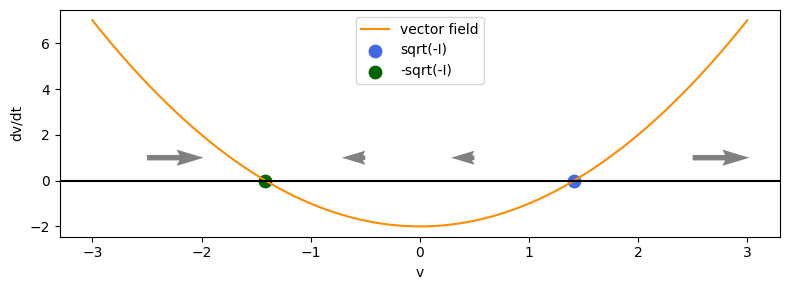

In [4]:
def qif_vf(v, I):
    return v**2 + I

# define input
I = -2.0

# calculate equilibria
v_1 = np.sqrt(-I)
v_2 = -v_1

# evaluate vectorfield for different membrane potential values
v_range = np.linspace(-3.0, 3.0, num=1000)
vf = qif_vf(v_range, I)
v_arrows = np.asarray([-2.5, -0.5, 0.5, 2.5])
vf_arrows = qif_vf(v_arrows, I)

# plot vectorfield vs. membrane potential
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(v_range, vf, color="darkorange", label="vector field")
ax.axhline(y=0.0, color="black")
ax.quiver(v_arrows, np.ones_like(v_arrows), vf_arrows, np.zeros_like(vf_arrows), color='grey')
ax.scatter(v_1, 0.0, label="sqrt(-I)", color="royalblue", s=80)
ax.scatter(v_2, 0.0, label="-sqrt(-I)", color="darkgreen", s=80)
ax.set_xlabel("v")
ax.set_ylabel("dv/dt")
ax.legend()
plt.tight_layout()

### Stability of equilibria

As indicated by the grey arrows in the above visualization, the QIF neuron tends to flow towards the equilibrium point $v_2 = - \sqrt(-I)$ and away from the equilibrium point $v_1 = \sqrt(-I)$.
The property of equilibria that determines whether they act as an attractor, i.e. whether the system evolves towards an equilibrium if in its vicinity, or whether they have repelling characteristics, is their [stability](http://www.scholarpedia.org/article/Stability_of_equilibria). 

<br/>

Equilibria can be stable or unstable, meaning that they are fully attracting or repelling in at least one dimension of the phase space. In most cases, the stability of an equilibrium can be identified by evaluating the [Jacobian](https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant) of the system at the equilibrium point, i.e. given a solution $\mathbf{y^*}$ with $\mathbf{f}(\mathbf{y^*}) = 0$, we would like to know $\mathbf{J}_{ij}(\mathbf{y^*}) = \frac{\partial \mathbf{f}_i}{\partial \mathbf{y}_j}(\mathbf{y^*})$. This procedure corresponds to a linearization of the system dynamics around the equilibrium point, since we are disregarding any higher-order derivatives of the system dynamics. Intuitively, we are examining the evolution of a small perturbation of the equilibrium solution $p = y^* + \epsilon$ given a linear approximation of the system dynamics $\frac{d \mathbf{p}}{dt} = \mathbf{J} \mathbf{p}$. 

<br/>

In the case of the QIF neuron, which only has a single one-dimensional state variable, the Jacobian simplifies to $J = \frac{\partial f}{\partial v} = 2 v$. We can thus evaluate $J(v_1) = 2 \sqrt(-I) > 0$ and $J(v_2) = - 2 \sqrt(-I) < 0$. This reveals that the vector field of the QIF neuron changes from a positive to a negative value at $v_2$ and from a negative to a positive value at $v_1$. We can confirm this visually be inspecting the above vector field plot. 
Hence, we can confirm our previous observation that the equilibrium point at $v_2 = - \sqrt(-I)$ appears to be attracting and thus stable, whereas the equilibrium point at $v_1 = \sqrt(-I)$ is repelling and thus unstable. 

<br/>

In general, it holds for all one-dimensional systems that if $\frac{\partial f}{\partial y}(y^*) > 0$, the equilibrium point $y^*$ is unstable, whereas $\frac{\partial f}{\partial y}(y^*) < 0$ implies that $y^*$ is a stable equilibrium point solution of the system. Stable equilibrium points and unstable equilibrium points are the only equilibria that can exist in a one-dimensional system. 

<br/>

For systems of dimensionality $> 1$, the full Jacobian $\mathbf{J}_{ij}(\mathbf{y^*}) = \frac{\partial \mathbf{f}_i}{\partial \mathbf{y}_j}(\mathbf{y^*})$ has to be evaluated to determine the stability of an equilibrium point. Since the Jacobian $\mathbf{J} \in \mathbb{R}^{N \times N}$ is not a scalar anymore, the stability rule for the one-dimensional case cannot be applied anymore either. 
Instead, we wave to inspect the [eigenvalue spectrum](https://en.wikipedia.org/wiki/Spectrum_of_a_matrix) of the Jacobian. The stability rule now states that, if eigenvalues of the Jacobian have negative real parts, the equilibrium is stable. If a single eigenvalue has a positive real part, the equilibrium is unstable.
For a summary of the different types of equilibrium points that you can find in higher-dimensional systems, see [this scholarpedia entry](http://www.scholarpedia.org/article/Equilibrium).

## Bifurcation theory

Now that we have learned how to identify the equilibrium points of a dynamical systems as well as their stability, let's turn to another main topic of dynamical systems theory - describing how the equilibrium point structure of a system changes, as the parameters of the systems are altered.
In neuroscience, this translates to the question of how the dynamics of a neuron model or neural network model change as we alter some property of the neurons or their connectivity.

<br/>

One such scenario we already encountered during our studies of the QIF neuron dynamics. 
We found that the QIF neuron has two equilibria $v_1 = \sqrt(-I)$ and $v_2 = - \sqrt(-I)$.
We can immediatly see that the locations of these two equilibria change as the input $I$ to the neuron changes. This is visualized below.

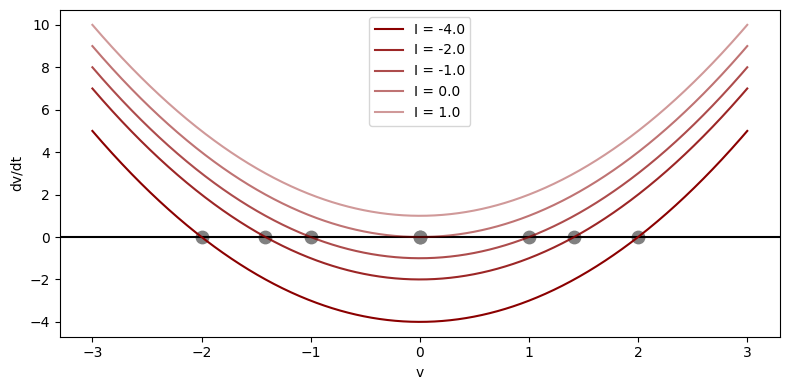

In [5]:
# define different inputs
inputs = np.asarray([-4.0, -2.0, -1.0, 0.0, 1.0])

# evaluate vectorfield for each input
v_range = np.linspace(-3.0, 3.0, num=1000)
vfs, equilibria = [], []
for I in inputs:
    vfs.append(qif_vf(v_range, I))
    if I > 0.0:
        equilibria.append([np.nan, np.nan])
    else:
        equilibria.append([np.sqrt(-I), -np.sqrt(-I)])

# plot vectorfield vs. membrane potential for each input
fig, ax = plt.subplots(figsize=(8, 4))
ax.axhline(y=0.0, color="black")
alphas = [1.0, 0.85, 0.7, 0.55, 0.4]
for alpha, (v_1, v_2), vf, I in zip(alphas, equilibria, vfs, inputs):
    ax.plot(v_range, vf, color="darkred", label=f"I = {I}", alpha=alpha)
    ax.scatter(v_1, 0.0, color="grey", s=80)
    ax.scatter(v_2, 0.0, color="grey", s=80)
ax.set_xlabel("v")
ax.set_ylabel("dv/dt")
ax.legend()
plt.tight_layout()

There are three things that we can observe from the equations of $v_1$ and $v_2$ that are also visualized above:

- The equilibria of the QIF neuron approach each other as the input $I$ increases towards $0$ from $I < 0$.
- The two equilibria collapse into a single one at $I = 0$.
- For $I > 0$, the equilibria cease to exist.

Such a scenario is referred to as a [bifurcation](http://www.scholarpedia.org/article/Bifurcation) scenario: Whenever the number or stability of the equilibria of a system changes, as we alter a system parameter, the system is said to undergo a *bifurcation*. The parameter that caused the bifurcation is called the *bifurcation parameter*, and the particular value of the parameter at which the bifurcation happens is called the *bifurcation point*. In our example, the bifurcation parameter is $I$ and the bifurcation point is $I = 0.0$. 

<br/>

The branch of dynamical systems theory that is concerned with describing such parameter dependencies of equilibria is called [bifurcation theory](https://en.wikipedia.org/wiki/Bifurcation_theory). Bifurcation theory seeks to describe qualitatively different types of bifurcations that can appear in a dynamical system and how to identify whether a system has undergone a particular bifurcation.
In one dimensional systems, there are only 4 different bifurcation types that can appear: The [saddle-node bifurcation](http://www.scholarpedia.org/article/Saddle-node_bifurcation) (also called *fold* bifurcation), the [transcritical bifurcation](https://en.wikipedia.org/wiki/Transcritical_bifurcation), and the subcritical and supercritical [pitchfork bifurcations](https://en.wikipedia.org/wiki/Pitchfork_bifurcation).

<br/>

Each of these bifurcations leads to a change in the number of stable and unstable equilibria of the one-dimensional system. If you follow the links to the description of each of the bifurcation types, you will notice that they have different one-dimensional equations that describe their so-called [normal forms](https://en.wikipedia.org/wiki/Normal_form_(dynamical_systems)). 
Normal forms are a powerful tool, since they represent the most simple dynamical system in which a particular bifurcation type can appear. Also, it is guaranteed that, if a particular bifurcation type appears in an arbitrarily complex dynamical system, it will locally behave like the simplified normal form if sufficiently close to the bifurcation point. Hence, normal form analysis helps to understand the behavior of potentially very complex dynamical systems.

### The Bifurcation of the QIF Neuron

The membrane potential equation of the QIF neuron happens to be identical to the normal form of the saddle-node bifurcation. In this particular bifurcation scenario, a stable equilibrium and an unstable equilibrium approach each other, collide at the bifurcation point, and cease to exist beyond the bifurcation point. What does the existence of this bifurcation mean for the behavior that the QIF neuron can express?

<br/>

Before the bifurcation point, when $I < 0$, the QIF neuron is governed by two equilibria $v_1 = \sqrt(-I)$ and $v_2 = -\sqrt(-I)$. For any membrane potential $v < v_1$, the membrane potential will asymptotically approach $v_2$. Hence, $v_2$ acts as a resting membrane potential. If the membrane potential becomes $v > v_1$ due to some transient input, for example, the membrane potential will grow towards infinity instead. To keep the membrane potential bounded, a reset rule is introduced:

$$v > v_{\text{cutoff}}: v \leftarrow v_{\text{reset}}$$

In words - the membrane potential is reset to $v_{\text{reset}}$ after reaching the cutoff potential $v_{\text{cutoff}}$. The neuron is said to evoke an action potential at the time of reaching the cutoff potential. Since this is the spike generation mechanism of the QIF neuron, the unstable equilibrium $v_1$ acts as the spiking threshold of the neuron.  

<br/>

For $I < 0$, the QIF neuron is in an excitable regime. In the absense of input, it will settle at its resting membrane potential. Weak transient inputs may perturb the neuron away from it, but it will decay back to the resting membrane potential after perturbation. However, sufficiently strong transient inputs can push the system over the spiking threshold, making it elicit a single action potential, before going back to the resting state. For $I > 0$, however, the QIF neuron has no equilibria. It will thus always diverge towards the cutoff potential, at which point it will generate a spike and cause the reset. Thus, the saddle node bifurcation causes the neuron to transitiom from an excitable regime to a periodically spiking regime. Due to the reset rule, that effectivrly creates a circular membrane potential variable that can only evolve between the values $v_{\text{cutoff}}$ and $v_{\text{reset}}$, this bifurcation is also called [saddle-node-on-invariant-circle bifurcation](http://www.scholarpedia.org/article/User:Eugene_M._Izhikevich/Proposed/Saddle-node_bifurcation_on_invariant_circle).

<br/>

### Bifurcations in higher dimensional systems

<br/>

Moving beyond one-dimensional differential equation systems, more types of solutions and bifurcations can occur. In two- and higher-dimensional systems, periodic solutions can occur that are also called [limit cycles](https://en.wikipedia.org/wiki/Limit_cycle). Limit cycles can be stable or unstable and can change stability or cease to exist via different types of bifurcations as well. In three- and higher-dimensional systems, chaotic and quasi-periodic solutions can additionally occur, and they can also undergo bifurcations. Some examples of chaotic trajectories of dynamical systems can be found [here](https://www.scholarpedia.org/article/Chaos_topology).

<br/>

The next two lectures will show some neurodynamic models in which periodic and even chaotic solutions can occur. However, we won't treat them in a bifurcation theoretic sense. The main message to take away from this lecture is that dynamical systems theory and bifurcation theory provide powerful tools to identify the solutions of a dynamical system that govern its long-term behavior, and study how these solutions are affected by parameter changes in the system. These tools find direct application in theoretical neuroscience, where they help us to develop and understand mathematical models of neurons and neural networks. 